Solar Noon Time: 2023-06-21 12:58:00-04:00
Zenith Angle at Solar Noon: 17.27509085555704 degrees
Optimal Tilt Angle: 7 degrees
Zenith angle tilt: 17.27509085555704
Total Irradiance with Zenith Angle Tilt: 479245.8214898811
Total Irradiance with Optimal Tilt: 485460.03049445705


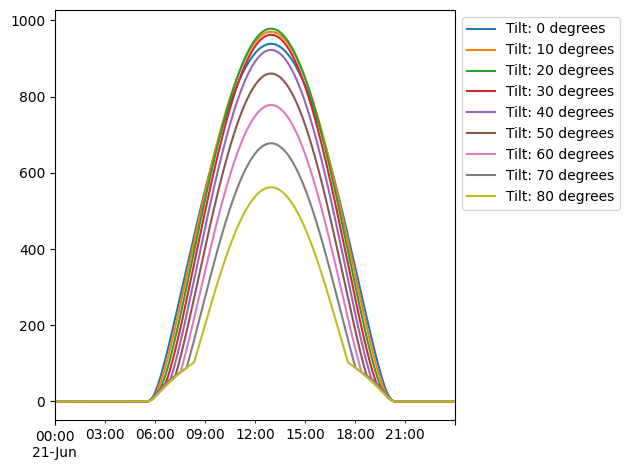

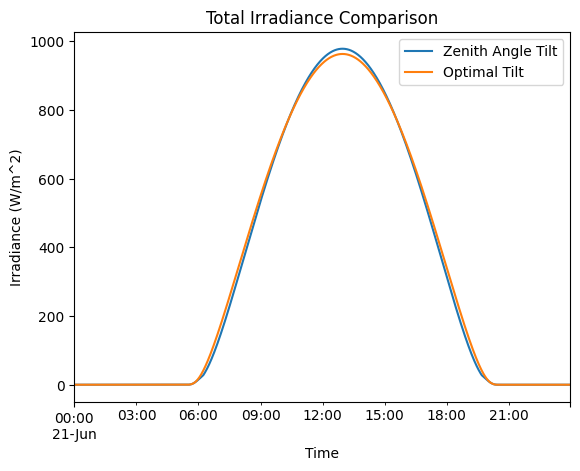

In [27]:
import pvlib
from pvlib.location import Location
from pvlib.irradiance import get_total_irradiance
from pvlib.solarposition import get_solarposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Specify your location and date
latitude = 40.7128  # Example: New York City
longitude = -74.0060
tz = 'America/New_York'  # Time zone
date = '2023-06-21'  # Specific day

# Specify your location and date
date = '2023-06-21'  # Example: Specific day
tz = 'America/New_York'  # Time zone

# Start and end times for the specified day
start = pd.Timestamp(f'{date} 00:00', tz=tz)
end = pd.Timestamp(f'{date} 23:59', tz=tz)

# Generate times with a frequency of one minute
times = pd.date_range(start=start, end=end, freq='min')

# Create a Location object
loc = Location(latitude, longitude, tz=tz)

# Generate clear sky data
clearsky = loc.get_clearsky(times)  # Get clear sky data

# Calculate solar position
solar_position = get_solarposition(times, latitude, longitude)

# Assuming a fixed azimuth angle (e.g., facing south in the Northern Hemisphere)
azimuth = 180

# Iterate over possible tilt angles to find the optimal tilt
tilt_angles = np.arange(0, 90, 1)  # Range of tilt angles from 0 to 89 degrees
max_power = 0
optimal_tilt = 0

# Find solar noon by locating the minimum zenith angle
solar_noon_index = solar_position['zenith'].idxmin()
zenith_angle_at_solar_noon = solar_position.at[solar_noon_index, 'zenith']

print(f"Solar Noon Time: {solar_noon_index}")
print(f"Zenith Angle at Solar Noon: {zenith_angle_at_solar_noon} degrees")

plt.figure()
for tilt in tilt_angles:
    # Calculate total irradiance on the panel for this tilt
    irradiance = get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=azimuth,
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth']
    )
    
    if tilt in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]:
        irradiance['poa_global'].plot(label=f'Tilt: {tilt} degrees')
    
    # Sum the total irradiance for the day
    total_irradiance = irradiance['poa_global'].sum()
    
    # Check if this tilt angle gives us more power
    if total_irradiance > max_power:
        max_power = total_irradiance
        optimal_tilt = tilt

print(f"Optimal Tilt Angle: {optimal_tilt} degrees")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moves the legend to the right of the plot
plt.tight_layout()  # Adjusts the plot size to make room for the legend
    

# Assuming you have these variables defined from earlier steps:
# times, location, solar_position, clearsky

# Correctly extracting the solar zenith angle at solar noon
solar_noon_index = solar_position['zenith'].idxmin()  # Finding the index for solar noon
solar_noon_zenith = solar_position.at[solar_noon_index, 'zenith']  # Extracting the solar zenith angle at solar noon

# Convert solar zenith angle at solar noon to a tilt angle
#zenith_angle_tilt = 90 - solar_noon_zenith  # This assumes 'solar_noon_zenith' is already in the correct form
zenith_angle_tilt = solar_noon_zenith

# Set the surface azimuth (direction panels are facing) - 180 degrees for south-facing in the Northern Hemisphere
surface_azimuth = 180

irradiance_zenith_tilt = get_total_irradiance(
    surface_tilt=zenith_angle_tilt,
    surface_azimuth=surface_azimuth,
    dni=clearsky['dni'],
    ghi=clearsky['ghi'],
    dhi=clearsky['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth']
)

# Scenario 2: Panels tilted at the optimal angle
optimal_angle_tilt = 7  # From your calculations
irradiance_optimal_tilt = get_total_irradiance(
    surface_tilt=optimal_angle_tilt,
    surface_azimuth=surface_azimuth,
    dni=clearsky['dni'],
    ghi=clearsky['ghi'],
    dhi=clearsky['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth']
)

# Sum the total irradiance for each scenario to compare
total_irradiance_zenith_tilt = irradiance_zenith_tilt['poa_global'].sum()
total_irradiance_optimal_tilt = irradiance_optimal_tilt['poa_global'].sum()

print(f"Zenith angle tilt: {zenith_angle_tilt}")
print(f"Total Irradiance with Zenith Angle Tilt: {total_irradiance_zenith_tilt}")
print(f"Total Irradiance with Optimal Tilt: {total_irradiance_optimal_tilt}")

plt.figure()
irradiance_zenith_tilt['poa_global'].plot(label='Zenith Angle Tilt')
irradiance_optimal_tilt['poa_global'].plot(label='Optimal Tilt')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m^2)')
plt.title('Total Irradiance Comparison')
plt.legend()

Solar Noon Time: 2023-06-21 12:58:00-04:00
Zenith Angle at Solar Noon: 17.27509085555704 degrees
Optimal Tilt Angle: 7 degrees


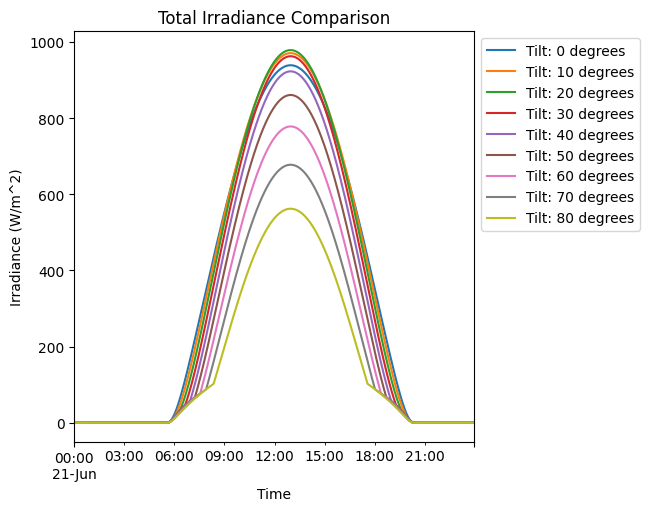

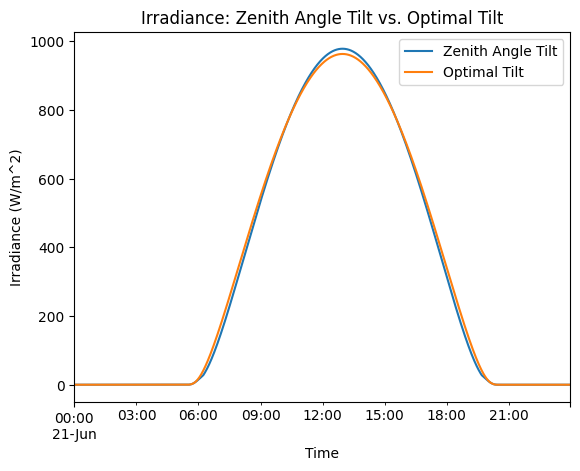

Total Irradiance with Zenith Angle Tilt: 479245.8214898811
Total Irradiance with Optimal Tilt: 485460.03049445705


In [31]:
import pvlib
from pvlib.location import Location
from pvlib.irradiance import get_total_irradiance
from pvlib.solarposition import get_solarposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Solar Noon Time: 2024-01-17 12:37:00-05:00
Zenith Angle at Solar Noon: 45.3408958053712 degrees
Optimal Tilt Angle: 51 degrees


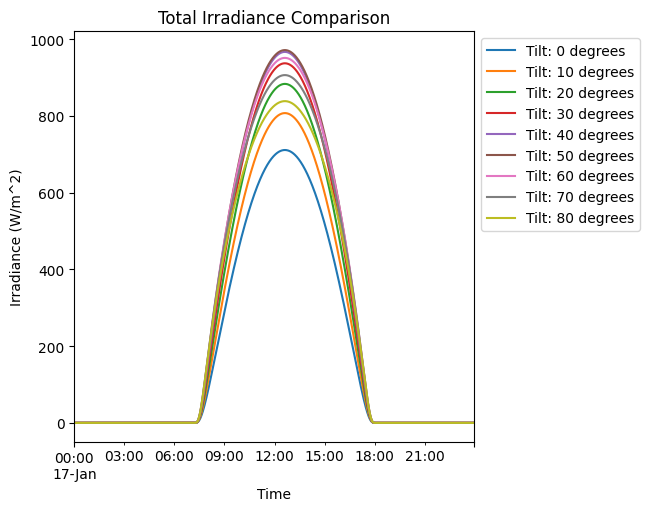

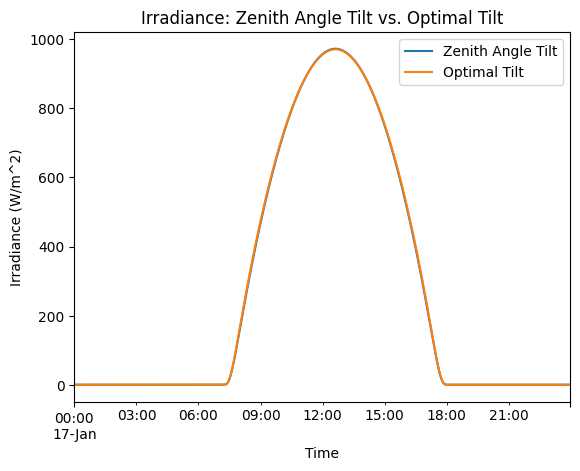

Total Irradiance with Zenith Angle Tilt: 391918.7427689438
Total Irradiance with Optimal Tilt: 393462.5866110829


In [32]:

#locations['Key West'] = (24.6, -81.8, 'Key West', 1, 'Etc/GMT+5')


# Define location and date for solar calculations
latitude = 24.6  # Key West latitude
longitude = -81.8  # Key West longitude
tz = 'America/New_York'  # Time zone
date = '2024-01-17'  # Date for analysis

# Generate a range of times for the specified day at one-minute intervals
start = pd.Timestamp(f'{date} 00:00', tz=tz)
end = pd.Timestamp(f'{date} 23:59', tz=tz)
times = pd.date_range(start=start, end=end, freq='min')

# Initialize a Location object with the specified latitude, longitude, and timezone
loc = Location(latitude, longitude, tz=tz)

# Generate clear sky data for the location and times
clearsky = loc.get_clearsky(times)

# Calculate the solar position for every minute of the specified day
solar_position = get_solarposition(times, latitude, longitude)

# Find the time of solar noon (when the zenith angle is minimal)
solar_noon_index = solar_position['zenith'].idxmin()
zenith_angle_at_solar_noon = solar_position.at[solar_noon_index, 'zenith']

# Output the time of solar noon and the zenith angle
print(f"Solar Noon Time: {solar_noon_index}")
print(f"Zenith Angle at Solar Noon: {zenith_angle_at_solar_noon} degrees")

# Determine the fixed azimuth angle for the solar panels (facing south in the Northern Hemisphere)
azimuth = 180

# Find the optimal tilt angle by iterating over a range of tilt angles and calculating the total irradiance
tilt_angles = np.arange(0, 90, 1)  # Tilt angles from 0 to 89 degrees
max_power = 0
optimal_tilt = 0

for tilt in tilt_angles:
    # Calculate the total irradiance on the panel for each tilt angle
    irradiance = get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=azimuth,
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth']
    )
    
    # Select tilt angles for plotting
    if tilt in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]:
        irradiance['poa_global'].plot(label=f'Tilt: {tilt} degrees')
    
    # Identify the tilt angle that results in the maximum total irradiance
    total_irradiance = irradiance['poa_global'].sum()
    if total_irradiance > max_power:
        max_power = total_irradiance
        optimal_tilt = tilt

# Display the optimal tilt angle
print(f"Optimal Tilt Angle: {optimal_tilt} degrees")

# Plotting setup
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m^2)')
plt.title('Total Irradiance Comparison')

# Plotting the total irradiance for zenith angle tilt vs. optimal tilt
plt.figure()
# Scenario 1: Zenith angle tilt
irradiance_zenith_tilt = get_total_irradiance(
    surface_tilt=zenith_angle_at_solar_noon,  # Use solar zenith angle directly
    surface_azimuth=azimuth,
    dni=clearsky['dni'],
    ghi=clearsky['ghi'],
    dhi=clearsky['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth']
)

irradiance_zenith_tilt['poa_global'].plot(label='Zenith Angle Tilt')

# Scenario 2: Optimal tilt
irradiance_optimal_tilt = get_total_irradiance(
    surface_tilt=optimal_tilt,
    surface_azimuth=azimuth,
    dni=clearsky['dni'],
    ghi=clearsky['ghi'],
    dhi=clearsky['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth']
)

irradiance_optimal_tilt['poa_global'].plot(label='Optimal Tilt')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m^2)')
plt.title('Irradiance: Zenith Angle Tilt vs. Optimal Tilt')
plt.show()

total_irradiance_zenith_tilt = irradiance_zenith_tilt['poa_global'].sum()
total_irradiance_optimal_tilt = irradiance_optimal_tilt['poa_global'].sum()

print(f"Total Irradiance with Zenith Angle Tilt: {total_irradiance_zenith_tilt}")
print(f"Total Irradiance with Optimal Tilt: {total_irradiance_optimal_tilt}")
